# Lab assignment: perceptron training


In this assignment we will learn how perceptrons work and are trained.

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<table align="left">
 <tr><td width="80"><img src="question.png" style="width:auto;height:auto"></td><td>You will need to solve a question by writing your own code or answer in the cell immediately below or in a different file, as instructed.</td></tr>
 <tr><td width="80"><img src="exclamation.png" style="width:auto;height:auto"></td><td>This is a hint or useful observation that can help you solve this assignment. You should pay attention to these hints to better understand the assignment.</td></tr>
 <tr><td width="80"><img src="pro.png" style="width:auto;height:auto"></td><td>This is an advanced and voluntary exercise that can help you gain a deeper knowledge into the topic. Good luck!</td></tr>
</table>


During the assignment you will make use of several Python packages that might not be installed in your machine. If that is the case, you can install new Python packages with

    conda install PACKAGENAME
    
if you are using Python Anaconda. Else you should use

    pip install PACKAGENAME

You will need the following packages for this particular assignment. Make sure they are available before proceeding:

* **numpy**
* **scikit-learn**

Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press Caps+Shift to produce a pop-out with related documentation. This will only work inside code cells.

Let's go!

## The AND and OR problems

Let us define the AND and OR problems in the **dataset** form we will be using throughout this assignment. A dataset is composed of two matrices X and Y, storing respectively the **inputs** fed to the networks and the desired **outputs** or **targets** for such inputs. We will use numpy's arrays for this purpose:

In [24]:
import numpy as np
X_and = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
Y_and = np.array([[0], [0], [0], [1]])
X_or = X_and.copy()    # same inputs as for AND
Y_or = np.array([[0], [1], [1], [1]])
print(X_and)
print(Y_and)
print(X_or)
print(Y_or)

[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[[0]
 [0]
 [0]
 [1]]
[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[[0]
 [1]
 [1]
 [1]]


Note that in the patterns above we have prepended a 1, so that the **weights** **w** also include the **bias** term b and a dot product of the form **w**·**x** actually computes **w**·**x** + b. Hence, in this particular case **w** = (b, w1, w2).

## Perceptrons

As you have seen in the theory, **perceptrons** are based on the **McCulloch-Pitts neuron**, which is a simplified version of a neuron in the human brain. The **activation function** of this neuron is 1 when its inputs are greater than or equal to 0, and 0 otherwise:

In [25]:
def step_activation(x):
    return 1*(x >= 0)   # multiply by 1 to change from boolean to int

<table align="left">
 <tr><td width="80"><img src="question.png" style="width:auto;height:auto"></td><td>
Figure out by yourself some values for <b>w</b> which solve the AND and OR problems. Store them in 2 variables called <b>w_and</b> and <b>w_or</b>.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="exclamation.png" style="width:auto;height:auto"></td><td>
It may help if you print the points in (x1, x2) axes and interpret <b>w</b> and b as a hyperplane.
 </td></tr>
</table>

In [26]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

In [27]:
w_or = [-1,1,1] 

In [28]:
w_and = [-1,0.5,0.5]

In [29]:
print(w_and)
print(w_or)

[-1, 0.5, 0.5]
[-1, 1, 1]


If your weights are correct, the following should output true:

In [30]:
print(np.all(step_activation(X_and.dot(w_and)) == Y_and.ravel()))
print(np.all(step_activation(X_or.dot(w_or)) == Y_or.ravel()))

True
True


Observe that we are already taking advantage of **matrix calculus**: by multiplying above the input matrix with the weight vector we can simultaneously obtain the perceptron's outputs for all patterns. Then we just need to compare whether those outputs are actually the desired ones.

Let us code now **Rosenblatt's perceptron**, so that it learns automatically **w_and** and **w_or** for us, as they are both **linearly separable** problems.

<table align="left">
 <tr><td width="80"><img src="question.png" style="width:auto;height:auto"></td><td>
Implement Rosenblatt's perceptron in a function called **perceptron_learn**. The inputs should be the X and Y matrices for the problem to be solved, and the output should be the **w** vector comprising both the bias and the actual weights.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="exclamation.png" style="width:auto;height:auto"></td><td>
Rosenblatt's algorithm operates in an **online** way, so you cannot take advantage of matrix calculus, as the weight vector **w** may change with every single pattern.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="exclamation.png" style="width:auto;height:auto"></td><td>
For comparison purposes, initialize **w = 0**. The function **zeros** in numpy does exactly this.
 </td></tr>
</table>

In [31]:
number_of_epochs = 10

def perceptron_learn(X, Y):
    # Initialize weights vector with zeroes
    num_features = X.shape[1]
    w = np.zeros(num_features)
    error = True
    # Perform the epochs
    while error == True:
        for i in range(number_of_epochs):
          # For every combination of (X_i, Y_i)
          for sample, desired_outcome in zip(X, Y):
            # Generate prediction and compare with desired outcome
            outcome = np.dot(sample, w)
            prediction = step_activation(outcome)
            difference   = (desired_outcome - prediction)
            if difference != 0:
                # Compute weight update via Perceptron Learning Rule
                w += difference * sample
                error = True
            else:
                error = False
    return w

<table align="left">
 <tr><td width="80"><img src="question.png" style="width:auto;height:auto"></td><td>
Test your implementation with the AND and OR problems. How many **epochs** are needed for convergence? What values do you get for **w_and** and **w_or**?
 </td></tr>
</table>

In [32]:
W_and= perceptron_learn(X_and,Y_and)
W_and

array([-3.,  2.,  1.])

In [33]:
W_or = perceptron_learn(X_or,Y_or)
W_or

array([-1.,  1.,  1.])

In [34]:
print(np.all(step_activation(X_and.dot(W_and)) == Y_and.ravel()))
print(np.all(step_activation(X_or.dot(W_or)) == Y_or.ravel()))

True
True


**The perceptron alorithm was able to learn the value of W_and and W_or that solves the AND and OR classification problem**

<table align="left">
 <tr><td width="80"><img src="question.png" style="width:auto;height:auto"></td><td>
Verify that these new values for **w_and** and **w_or** do solve the respective problems. What happens if you initialize weights differently in **perceptron_learn**?
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="exclamation.png" style="width:auto;height:auto"></td><td>
Although Rosenblatt's algorithm states that all weights should be initialized to 0, you can initialize them randomly and convergence is still guaranteed.
 </td></tr>
</table>

In [35]:
from numpy import random
number_of_epochs = 10

def perceptron_learn(X, Y):
    # Initialize weights vector with random numbers
    num_features = X.shape[1]
    w = random.rand(num_features)
    # Perform the epochs
    for i in range(number_of_epochs):
      # For every combination of (X_i, D_i)
      for sample, desired_outcome in zip(X, Y):
        # Generate prediction and compare with desired outcome
        outcome = np.dot(sample, w)
        prediction = step_activation(outcome)
        difference    = (desired_outcome - prediction)
        # Compute weight update via Perceptron Learning Rule
        w += difference * sample
    return w

In [36]:
W_and = perceptron_learn(X_and,Y_and)
W_and

array([-2.52864899,  1.53818643,  1.19087079])

In [37]:
W_or = perceptron_learn(X_or,Y_or)
W_or

array([-0.01225102,  0.3181571 ,  0.27650929])

In [38]:
print(np.all(step_activation(X_and.dot(W_and)) == Y_and.ravel()))
print(np.all(step_activation(X_or.dot(W_or)) == Y_or.ravel()))

True
True


**As we can see the W_and and W_or learned by the algorithim when initializing them randomly is still working**

Let us compare our implementation with that of *scikit-learn*. The class which implements a perceptron is **Perceptron**:

In [39]:
from sklearn.linear_model import Perceptron
Perceptron()

Perceptron()

In order to make things comparable, we need no regularization and not shuffling the patterns in each epoch:

In [40]:
clf = Perceptron(alpha = 0.0, shuffle=False)

<table align="left">
 <tr><td width="80"><img src="question.png" style="width:auto;height:auto"></td><td>
Train the scikit-learn perceptron for the AND and OR problems. Do you obtain the same values for **w_and** and **w_or**? Why/why not?
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="exclamation.png" style="width:auto;height:auto"></td><td>
Make sure that the parameter **n_iter** is at least as large as the number of epochs you obtained before.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="exclamation.png" style="width:auto;height:auto"></td><td>
Since *scikit-learn* splits weights (**coef_**) from biases (**intercept_**), we do not need to prepend anymore a 1 to the patterns. Be careful when feeding them to the **fit** method. Also, take this into account when checking the perceptron's output and comparing it to the one obtained with your method **perceptron_learn**.
 </td></tr>
</table>

**This problem can be solved in two ways, the first one is by eliminating the first column of the X matrix and the second one is by seting the fit_intercept = False in the perceptron that way as we are already considering the bias in our weights it doesnt calculate it anymore.**


Lest see these two ways.

### First method

In [41]:
clf = Perceptron(alpha = 0.0, shuffle=False,fit_intercept=False,max_iter=10)

In [42]:
and_fit = clf.fit(X_and,Y_and)

C:\Users\franc\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [43]:
clf.predict(X_and)

array([0, 0, 0, 1])

In [44]:
W_and = and_fit.coef_
W_and = np.concatenate(W_and)
W_and

array([-4.,  3.,  2.])

In [45]:
and_fit.n_iter_

10

In [46]:
or_fit = clf.fit(X_or,Y_or)

C:\Users\franc\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [47]:
clf.get_params

<bound method BaseEstimator.get_params of Perceptron(alpha=0.0, fit_intercept=False, max_iter=10, shuffle=False)>

In [48]:
W_or = or_fit.coef_
W_or = np.concatenate(W_or)
W_or

array([-1.,  2.,  2.])

In [49]:
or_fit.n_iter_

8

In [50]:
clf.predict(X_or)

array([0, 1, 1, 1])

In [51]:
print(np.all(step_activation(X_and.dot(W_and)) == Y_and.ravel()))
print(np.all(step_activation(X_or.dot(W_or)) == Y_or.ravel()))

True
True


### Second method

In [52]:
clf_n = Perceptron(alpha = 0.0, shuffle=False,max_iter=10)

In [53]:
X_and_n = np.delete(X_and,0,axis=1)
X_and_n

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [54]:
Y_and = Y_and.ravel()

In [55]:
and_fit_n = clf_n.fit(X_and_n,Y_and)

C:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [56]:
W_and_n = and_fit_n.coef_
W_and_n = np.concatenate(W_and_n)
W_and_n

array([3., 2.])

In [57]:
and_bias = and_fit_n.intercept_
and_bias

array([-4.])

In [58]:
X_or_n = np.delete(X_or,0,axis=1)
X_or_n

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [59]:
Y_or = Y_or.ravel()

In [60]:
or_fit_n = clf_n.fit(X_or_n,Y_or)

In [61]:
W_or_n = or_fit_n.coef_
W_or_n = np.concatenate(W_or_n)
W_or_n

array([2., 2.])

In [62]:
or_bias = or_fit_n.intercept_
or_bias

array([-1.])

**As we can see if we introduce the bias in the weight array it gives the same output.**

## The XOR problem

As you know from the theory, Rosenblatt's perceptrons can only solve **linearly separable** problems. The AND and OR problems fall into this category, but the XOR problem does not.

<table align="left">
 <tr><td width="80"><img src="question.png" style="width:auto;height:auto"></td><td>
Define the XOR problem in two matrices **X_xor**, **Y_xor** as we did above for the AND and OR problems.
 </td></tr>
</table>

In [63]:
import numpy as np
X_xor = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
Y_xor = np.array([[0], [1], [1], [0]])
print(X_xor)
print(Y_xor)


[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[[0]
 [1]
 [1]
 [0]]


<table align="left">
 <tr><td width="80"><img src="question.png" style="width:auto;height:auto"></td><td>
Verify that **perceptron_learn** does not converge when given the XOR problem.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="exclamation.png" style="width:auto;height:auto"></td><td>
Introduce some control to exit the function after a maximum number of epochs has been reached. Otherwise, execution will go on forever and can stall your PC.
 </td></tr>
</table>

In [64]:
number_of_epochs = 100

def perceptron_learn_xor(X, Y):
    j = 0
    num_features = X.shape[1]
    w = np.zeros(num_features)
    error = True
    # Perform the epochs
    while error == True:
        for i in range(number_of_epochs):
          # For every combination of (X_i, D_i)
          for sample, desired_outcome in zip(X, Y):
            # Generate prediction and compare with desired outcome
            outcome = np.dot(sample, w)
            prediction = step_activation(outcome)
            difference   = (desired_outcome - prediction)
            if difference != 0:
                j += 1     
                if j == number_of_epochs:
                    print("The problem couldn´t be solved")
                    error = False                   
                # Compute weight update via Perceptron Learning Rule
                w += difference * sample               
            else:
                error = False
    return w

In [65]:
w = perceptron_learn_xor(X_xor,Y_xor)

The problem couldn´t be solved


In [66]:
w

array([ 0., -1.,  0.])

In [67]:
Y_xor.ravel()

array([0, 1, 1, 0])

In [68]:
print(np.all(step_activation(X_xor.dot(w)) == Y_xor.ravel()))

False


Inside the perceptron learn algorithm we have intrduced a way to stop the loop because if we hadn´t the loop would have been running for ever

**As we can see the result of the algorithm doesn´t solve the problem.**

<table align="left">
 <tr><td width="80"><img src="question.png" style="width:auto;height:auto"></td><td>
Verify that scikit-learn's **Perceptron** does not converge either for the XOR problem.
 </td></tr>
</table>

In [69]:
Y_xor = Y_xor.ravel()

In [70]:
xor_fit = clf.fit(X_xor,Y_xor)

In [71]:
W_xor = xor_fit.coef_
W_xor = np.concatenate(W_xor)
W_xor

array([0., 0., 0.])

In [72]:
print(np.all(step_activation(X_xor.dot(W_xor)) == Y_xor.ravel()))

False


**The Xor problem needs at least three neurons so the perceptrons algorithm in sklearn can´t solve it either.**

## Multilayer perceptrons

Because of the limitations perceptrons have, **multilayer perceptrons (MLPs)** are usually the choice when dealing with general problems. Let us use for now the following class for an MLP:

In [73]:
class MLP(object):

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

So that an MLP is initialized with a list specifying the sizes of the different layers. For instance:

In [74]:
sizes = [2, 3, 1]
net = MLP(sizes)

Creates an MLP with 2 input neurons, 3 hidden neurons and 1 output neuron. <u>Note also the convention of the weights: they are created in such a way that *weights[i][j][k]* denotes the weight connecting neuron k of the i-th layer to neuron j of the (i+1)-th layer</u> (assuming that input layer is layer 0, first hidden layer is layer 1, and so on). <u>The same logic applies for biases, so that *biases[i][j]* is the bias of neuron j of the (i+1)-th layer</u>.

In [75]:
print("Number of layers: " + str(net.num_layers))
print("Sizes of layers: " + str(net.sizes))
print("Biases of hidden layer: " + str(net.biases[0]))
print("Biases of output layer: " + str(net.biases[1]))
print("Weights between input and hidden layer: " + str(net.weights[0]))
print("Weights between hidden and output layer: " + str(net.weights[1]))

Number of layers: 3
Sizes of layers: [2, 3, 1]
Biases of hidden layer: [[-1.56250763]
 [-0.69270276]
 [ 1.45545696]]
Biases of output layer: [[0.42511568]]
Weights between input and hidden layer: [[ 0.04972079 -0.78317229]
 [-0.24091988 -0.79185413]
 [ 0.04096835  0.63110074]]
Weights between hidden and output layer: [[-1.40006044 -0.27693305  0.14339388]]


Let us assume for simplicity that all **activation functions** in our MLPs are going to be the *step_activation* defined above. Note that its implementation is vectorized, so that it works both for scalars and numpy arrays.

We can now easily program the **forward phase** of the **back-propagation** algorithm, that is, to input a pattern to the network and compute the network's outputs.

<table align="left">
 <tr><td width="80"><img src="question.png" style="width:auto;height:auto"></td><td>
Implement the function **forward_phase(mlp, x)** that, given an MLP and an input vector **x**, computes the MLP's outputs when **x** is fed.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="exclamation.png" style="width:auto;height:auto"></td><td>
Take advantage of matrix calculus. Make sure to reshape the input vector to column form, so that the matrix-vector products do not raise errors.
 </td></tr>
</table>

In [76]:
def step_activation(x):
    return 1*(x >= 0) 

In [77]:
def forward_propagate(mlp,X):
    old_inputs = X.copy()
    new_inputs = []
    for i in range(net.num_layers-1):
        w = mlp.weights[i]
        bias = mlp.biases[i]
        new_inputs = step_activation(w.dot(old_inputs) + bias)
        old_inputs = new_inputs.copy()
    return new_inputs

Since weights in the MLP class are initialized randomly, it is very unlikely that these initial weights actually solve the XOR problem.

<table align="left">
 <tr><td width="80"><img src="question.png" style="width:auto;height:auto"></td><td>
Check whether the MLP created above does solve XOR or not.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="exclamation.png" style="width:auto;height:auto"></td><td>
Again, the MLP class splits weights from biases, so you should not feed to the networks the ones prepended to the patterns.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="exclamation.png" style="width:auto;height:auto"></td><td>
Because of matrix calculus, the return of **forward_phase** will be in matrix form, when it is actually a scalar since there is only a single output neuron. You may need to flatten return values to compare them to the actual outputs.
 </td></tr>
</table>

In [78]:
X_xor 

array([[1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [79]:
X_xor_n = np.delete(X_xor,0,axis=1)
X_xor_n

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [80]:
X_xor_n1 = np.transpose(X_xor_n)
X_xor_n1

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [81]:
forward_propagate(net,X_xor_n1)

array([[1, 1, 1, 1]])

**As we can see the results is not the Y_xor solution**

<table align="left">
 <tr><td width="80"><img src="question.png" style="width:auto;height:auto"></td><td>
Build an MLP that actually solves XOR.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="exclamation.png" style="width:auto;height:auto"></td><td>
You know from the theory that it suffices with a hidden layer of just 2 neurons. Because we have not coded any learning algorithm (we would need to program the whole back-propagation algorithm for that), you will have to set directly its weights and biases so that it does the job.
 </td></tr>
</table>

In [82]:
####### INSERT YOUR CODE HERE
class MLP_XOR(object):

    def __init__(self, sizes):
        self.num_layers = 3
        self.sizes = sizes
        self.biases = [np.array([[-2],[-3]]),np.array([[-2]])]
        self.weights = [np.array([[-4,5],[4,-6]]),np.array([[4,4]])]

In [83]:
sizes = [2,2,1]

In [84]:
net_XOR = MLP_XOR(sizes)

In [85]:
print("Number of layers: " + str(net_XOR.num_layers))
print("Sizes of layers: " + str(net_XOR.sizes))
print("Biases of hidden layer: " + str(net_XOR.biases[0]))
print("Biases of output layer: " + str(net_XOR.biases[1]))
print("Weights between input and hidden layer: " + str(net_XOR.weights[0]))
print("Weights between hidden and output layer: " + str(net_XOR.weights[1]))

Number of layers: 3
Sizes of layers: [2, 2, 1]
Biases of hidden layer: [[-2]
 [-3]]
Biases of output layer: [[-2]]
Weights between input and hidden layer: [[-4  5]
 [ 4 -6]]
Weights between hidden and output layer: [[4 4]]


In [86]:
forward_propagate(net_XOR,X_xor_n1)

array([[0, 1, 1, 0]])

With this MPL that has a 3 layers 2 neurons for the input layer, 2 for the hidden layer and one in the output layer we get the Y_xor solution

Coding oneself the back-propagation algorithm is tedious and prone to errors (especially the **backward phase**), so it is only useful as an academic programming exercise. In practice, one resorts to implementations already available. *Scikit-learn* has two classes for MLPs, the **MLPClassifier** and the **MLPRegressor**:

In [87]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
print(MLPClassifier())
print(MLPRegressor())

MLPClassifier()
MLPRegressor()


The only differences between the two are the **loss function** (**cross-entropy** for classification, **MSE** for regression) and the activation function of the output layer (**sigmoid** for classification, **identity** for regression). As you can see, the parameters used in construction are exactly the same ones, as well as the default values.

<table align="left">
 <tr><td width="80"><img src="question.png" style="width:auto;height:auto"></td><td>
Discuss which of the above parameters you can identify with those seen in the theory slides and which you cannot.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="pro.png" style="width:auto;height:auto"></td><td>
Take some classification dataset used in the SVM assignments and fit an *MLPClassifier* by modifying the parameters you deem appropriate. Report the best network configuration you can find. Can you beat the best SVM you obtained for that problem?
 </td></tr>
</table>

In class we used a SVC model to try and classificate the digits images of a dataset, that classification problem gave us a 98% accuracy, lets see what we can do with a MLP classifier.

In [88]:
from sklearn.datasets import load_digits
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [89]:
X, y = load_digits(return_X_y=True)

In [90]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=13)

In [91]:
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [92]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [93]:
params = {'hidden_layer_sizes':[(20),(20,20),(50,50),(100,100,100)],
          'activation':['identity','tanh','relu'],
          'alpha':[0.001,0.01]}

In [94]:
miModelo = MLPClassifier()
gs = GridSearchCV(estimator=miModelo,param_grid=params,scoring='accuracy',cv=5,verbose=1)

In [95]:
gs.fit(X_train,y_train)
resultsCV = gs.cv_results_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [96]:
clfBest = gs.best_estimator_
print(clfBest)
clfBest.fit(X_train,y_train)

MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(50, 50))


MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(50, 50))

In [97]:
y_pred = clfBest.predict(X_test)

In [98]:
print(accuracy_score(y_test,y_pred))

0.9740740740740741


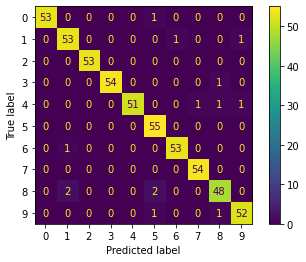

In [99]:
plot_confusion_matrix(clfBest,X_test,y_test)

**The accuracy of both models are very much alike, we couldn´t get a better result because the SVC model gave us already a very good acuraccy.**

<table align="left">
 <tr><td width="80"><img src="pro.png" style="width:auto;height:auto"></td><td>
Repeat with some regression dataset and an *MLPRegressor*. Are you able to beat the SVR?
 </td></tr>
</table>

In class we used a SVR model to try and make a regression of the boston dataset, that regression problem gave us a poorly 68% accuracy, lets see what we can do with a MLP regressor.

In [100]:
from sklearn.datasets import load_boston
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [101]:
X, y = load_boston(return_X_y=True)

In [102]:
sss = ShuffleSplit(n_splits=1,test_size=0.1,random_state=13)

In [103]:
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [104]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [105]:
params = {'hidden_layer_sizes':[(20),(20,20),(50,50),(100,100,100)],
          'activation':['identity','tanh','relu'],
          'alpha':[0.001,0.01]}

In [106]:
miModelo = MLPRegressor()
gs = GridSearchCV(estimator=miModelo,param_grid=params,scoring='r2',cv=5)

In [107]:
gs.fit(X_train,y_train)

C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['identity', 'tanh', 'relu'],
                         'alpha': [0.001, 0.01],
                         'hidden_layer_sizes': [20, (20, 20), (50, 50),
                                                (100, 100, 100)]},
             scoring='r2')

In [108]:
clfBest = gs.best_estimator_
print(clfBest)
clfBest.fit(X_train,y_train)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(100, 100, 100))


C:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.01, hidden_layer_sizes=(100, 100, 100))

In [109]:
y_pred = clfBest.predict(X_test)

In [110]:
print(r2_score(y_test,y_pred))

0.906170556959782


**With the MPL reggresor we get a way better r2 score, so we could say that this model is a better choice for this problem.**

<table align="left">
 <tr><td width="80"><img src="exclamation.png" style="width:auto;height:auto"></td><td>
Beware of normalizing your data before feeding them to an MLP. It is advised to use a pipeline with a *StandardScaler*.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="exclamation.png" style="width:auto;height:auto"></td><td>
Once in a pipeline, you can use grid search to try different choices for the MLP parameters.
 </td></tr>
</table>

<center>
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.<br>
                          THIS IS THE END OF THE ASSIGNMENT<br>
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.<br>
</center>